# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt  #ploting
import pandas as pd #data frames
import numpy as np #mathematical functions
import requests #Http requests
import time #day, seconds, etc
import datetime

# Import API key
from api_keys import api_key as api


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

d = datetime.datetime.today().strftime('%Y-%m-%d')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities = cities[0:600]
# print(cities)
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:


# # loop thru the city get json data
# for city in cities:
        
#     url = "http://api.openweathermap.org/data/2.5/weather?"
#     units = "metric"

#     # Build partial query URL
#     query_url = f"{url}appid={api}&units={units}&q="


# #     response = requests.get(query_url + city).json()
    
#     resultJson = requests.get(query_url + city).json()
#     print(resultJson)
    

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:

city_info = []
#loop thru cities
for city in cities:
        
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "metric"
    try:
        # Build partial query URL
        query_url = f"{url}appid={api}&units={units}&q="

        #turn into Json
        resultJson = requests.get(query_url + city).json()

        lat = resultJson["coord"]['lat']
        lng = resultJson['coord']['lon']
        max_temp = resultJson['main']['temp_max']
        humidity = resultJson["main"]["humidity"]
        clouds = resultJson["clouds"]["all"]
        wind = resultJson["wind"]["speed"]
        country = resultJson["sys"]["country"]
        date = resultJson["dt"]

            #append city info into list
        city_info.append({"City": city, 
                              "Lat": lat, 
                              "Lng": lng, 
                              "Max Temp": max_temp,
                              "Humidity": humidity,
                              "Cloudiness": clouds,
                              "Wind Speed": wind,
                              "Country": country,
                              "Date": date})
    except:
        print("Skipping City")
    
   

Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City
Skipping City


In [7]:
print(len(city_info))
print (city_info)

535
[{'City': 'sola', 'Lat': 58.89, 'Lng': 5.65, 'Max Temp': 8, 'Humidity': 87, 'Cloudiness': 75, 'Wind Speed': 5.1, 'Country': 'NO', 'Date': 1553894196}, {'City': 'shumyachi', 'Lat': 53.86, 'Lng': 32.43, 'Max Temp': 4.86, 'Humidity': 88, 'Cloudiness': 0, 'Wind Speed': 4.86, 'Country': 'RU', 'Date': 1553894378}, {'City': 'mataura', 'Lat': -46.19, 'Lng': 168.86, 'Max Temp': 9.44, 'Humidity': 98, 'Cloudiness': 0, 'Wind Speed': 1.51, 'Country': 'NZ', 'Date': 1553893806}, {'City': 'lasa', 'Lat': 34.92, 'Lng': 32.53, 'Max Temp': 16, 'Humidity': 82, 'Cloudiness': 75, 'Wind Speed': 3.6, 'Country': 'CY', 'Date': 1553894116}, {'City': 'atuona', 'Lat': -9.8, 'Lng': -139.03, 'Max Temp': 27.96, 'Humidity': 100, 'Cloudiness': 8, 'Wind Speed': 5.26, 'Country': 'PF', 'Date': 1553894378}, {'City': 'butaritari', 'Lat': 3.07, 'Lng': 172.79, 'Max Temp': 28.26, 'Humidity': 100, 'Cloudiness': 64, 'Wind Speed': 9.36, 'Country': 'KI', 'Date': 1553894379}, {'City': 'abu dhabi', 'Lat': 24.47, 'Lng': 54.37, 'Ma

In [8]:
# turn list into a df
cities_df = pd.DataFrame(city_info)
# cities_df.head()

cities_df.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [9]:
cities_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sola,75,NO,1553894196,87,58.89,5.65,8.00,5.10
1,shumyachi,0,RU,1553894378,88,53.86,32.43,4.86,4.86
2,mataura,0,NZ,1553893806,98,-46.19,168.86,9.44,1.51
3,lasa,75,CY,1553894116,82,34.92,32.53,16.00,3.60
4,atuona,8,PF,1553894378,100,-9.80,-139.03,27.96,5.26
5,butaritari,64,KI,1553894379,100,3.07,172.79,28.26,9.36
6,abu dhabi,0,AE,1553889600,68,24.47,54.37,22.00,2.46
7,port elizabeth,90,US,1553894358,48,39.31,-74.98,20.56,2.10
8,sao filipe,0,CV,1553894379,95,14.90,-24.50,21.76,8.21
9,koulamoutou,36,GA,1553894379,85,-1.13,12.47,25.26,1.31


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
#pull related info from data frames for plotting

clouds = cities_df['Cloudiness']
humidity = cities_df['Humidity']
lat = cities_df['Lat']
max_temp = cities_df ['Max Temp']
wind = cities_df['Wind Speed']



#### Latitude vs. Temperature Plot

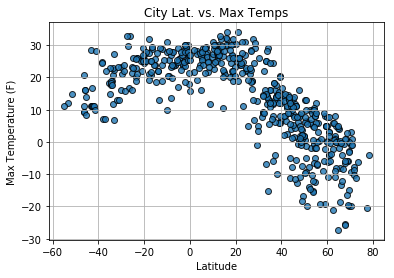

In [11]:
plt.scatter(lat, max_temp, edgecolor = 'black', linewidths = 1,
            marker = 'o', alpha = .8, label = "Cities")


plt.title("City Lat. vs. Max Temps")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()





#### Latitude vs. Humidity Plot

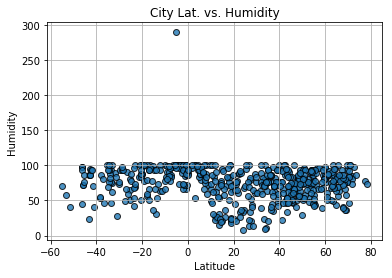

In [12]:
plt.scatter(lat, humidity, edgecolor = 'black', linewidths = 1,
            marker = 'o', alpha = .8, label = "Cities")


plt.title("City Lat. vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()


#### Latitude vs. Cloudiness Plot

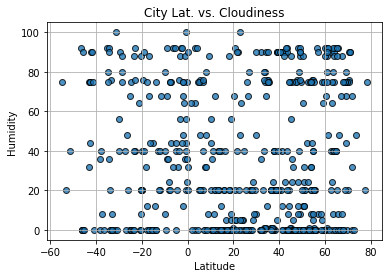

In [13]:
plt.scatter(lat, clouds, edgecolor = 'black', linewidths = 1,
            marker = 'o', alpha = .8, label = "Cities")


plt.title("City Lat. vs. Cloudiness")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()


#### Latitude vs. Wind Speed Plot

AttributeError: 'str' object has no attribute 'pop'

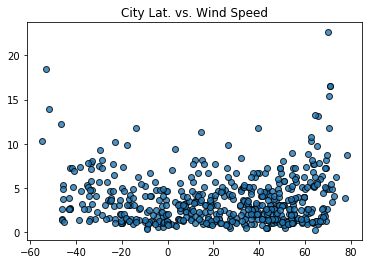

In [14]:
plt.scatter(lat, wind, edgecolor = 'black', linewidths = 1,
            marker = 'o', alpha = .8, label = "Cities")


plt.title("City Lat. vs. Wind Speed")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()